In [81]:
# create co-occurence matrix for most frequently occuring BF terms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string

In [87]:
reviews_file = "50_cities_google_businesses_and_reviews.csv"
bf_file = "build_features_vocab.csv"

all_reviews = pd.read_csv(reviews_file)
build_features = pd.read_csv(bf_file)

def strip_punctuation(s):
    return ''.join(c for c in s if c not in string.punctuation)

# convert to lowercase, remove punctuation and remove entries w/out review text
all_reviews = all_reviews[~all_reviews.text.isnull()]

all_reviews["text"] = all_reviews["text"].str.lower()
all_reviews["text"] = all_reviews["text"].apply(lambda x: strip_punctuation(x))
all_reviews["text"] = all_reviews["text"].apply(lambda x: " " + x + " ")

all_reviews.reset_index(inplace=True)
                
    
# add spaces and remove "*"
for feature in build_features:
    for i in range(len(build_features[feature].dropna())):
        build_features[feature][i] = " " + build_features[feature][i]
        if "*" in build_features[feature][i]:
            build_features[feature][i] = build_features[feature][i].replace("*", "")
        else:
            build_features[feature][i] = build_features[feature][i] + " "

In [88]:
# create dict of BF words to number of occurrences
n_occ = {}
for feature in build_features:
    for term in build_features[feature].dropna():
        n_occ[term] = all_reviews.text.str.contains(term).sum()

In [95]:
c = Counter(n_occ).most_common(50)
keywords = []
counts = []
for item in c:
    print(item[0], item[1])
    keywords.append(item[0])
    counts.append(item[1])

 desk  138
 views  79
 wifi  79
 door  47
 water  42
 bright  33
 natural light  28
 lounge  27
 table  22
 elevator  19
 wall  17
 fridge  16
 air  14
 rest  13
 computer  11
 tv  11
 screen  10
 weather  9
 plug  8
 ceiling  8
 color  8
 wood  7
 chair  7
 handle  7
 window  6
 couch  6
 engagement  6
 shower  6
 sun  6
 cloud  6
 rail  5
 switch  5
 bed  5
 dynamic  5
 refrigerator  5
 microwave  5
 sink  5
 storage  5
 showers  5
 sunny  4
 concrete  3
 marble  3
 shape  3
 hardware  3
 electrical  2
 plastic  2
 bamboo  2
 form  2
 smell  2
 mobility  2


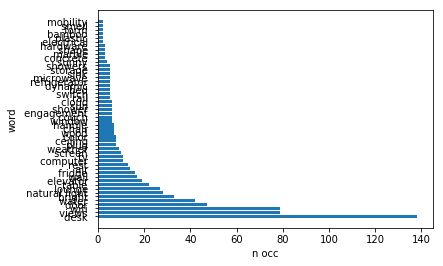

In [96]:
y_pos = [i for i, _ in enumerate(keywords)]

plt.barh(y_pos, counts)
plt.ylabel("word")
plt.xlabel("n occ")

plt.yticks(y_pos, keywords)
plt.show()

In [67]:
key_words = []
for item in c:
    key_words.append(item[0])

is_present = np.zeros((len(key_words), len(all_reviews)))
for term_idx in range(len(key_words)):
    for review_idx in range(len(all_reviews)):
        if key_words[term_idx] in all_reviews.text[review_idx]:
            is_present[term_idx, review_idx] = 1

In [68]:
# multiply occurrence matrix by its transpose to get co-occurrences
co_occ = np.dot(is_present, is_present.T)

n_occ = []
for i in range(len(co_occ[0])):
    n_occ.append(co_occ[i, i])
    #co_occ[i, i] = 0
    
n_occ = np.asarray(n_occ)

co_occ = co_occ/n_occ[:, None]

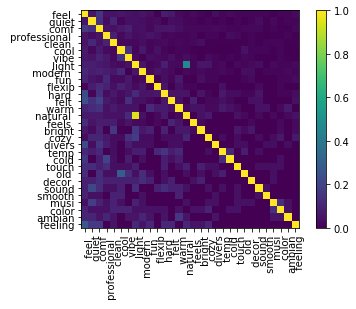

In [69]:
fig, ax = plt.subplots()
#im = ax.imshow(co_occ)

# We want to show all ticks...
ax.set_xticks(np.arange(len(key_words)))
ax.set_yticks(np.arange(len(key_words)))

# ... and label them with the respective list entries
ax.set_xticklabels(key_words)
ax.set_yticklabels(key_words)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")


plt.imshow(co_occ)
plt.colorbar()
plt.show()